# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
data.shape

(5392, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5392 non-null   int64 
 1   Release_Date           5392 non-null   object
 2   Movie_Title            5392 non-null   object
 3   USD_Production_Budget  5392 non-null   object
 4   USD_Worldwide_Gross    5392 non-null   object
 5   USD_Domestic_Gross     5392 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.9+ KB


In [7]:
# data.isna() will convert current dataframe such that each entry in the dataframe is replaced with boolean value showing if that entry is na or not
# values() will convert above dataframe into 2D array
# any returns true if any element of above 2D array is True (i.e. any value is NaN)
data.isna().values.any()

False

In [8]:
duplicated_data = data[data.duplicated()]
duplicated_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5391,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [9]:
data.drop_duplicates()
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [11]:
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
characters_to_remove = ["$", ","]

for column in columns_to_clean:
    for character in characters_to_remove:
        data[column] = data[column].astype(str).str.replace(character, "")
    data[column] = pd.to_numeric(data[column])

C:\Users\Ashok Bhatt\AppData\Local\Temp\ipykernel_20560\905536512.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].astype(str).str.replace(character, "")


In [12]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5392 non-null   int64         
 1   Release_Date           5392 non-null   datetime64[ns]
 2   Movie_Title            5392 non-null   object        
 3   USD_Production_Budget  5392 non-null   int64         
 4   USD_Worldwide_Gross    5392 non-null   int64         
 5   USD_Domestic_Gross     5392 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.9+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [15]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,392.00","5,392.00","5,392.00","5,392.00"
mean,"2,695.97","31,111,676.43","88,838,942.84","41,227,871.91"
std,"1,556.25","40,520,320.91","168,446,478.72","66,025,610.08"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.75","5,000,000.00","3,853,844.50","1,326,807.75"
50%,"2,695.50","17,000,000.00","27,448,962.00","17,186,735.00"
75%,"4,043.25","40,000,000.00","96,447,089.00","52,338,712.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [16]:
data['USD_Production_Budget'].mean().round(2)

31111676.43

In [17]:
data['USD_Worldwide_Gross'].mean().round(2)

88838942.84

In [18]:
data[data['USD_Domestic_Gross'] == data['USD_Domestic_Gross'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [19]:
data[data['USD_Worldwide_Gross'] == data['USD_Worldwide_Gross'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [20]:
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [21]:
data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [22]:
data[data['USD_Worldwide_Gross'] == data['USD_Worldwide_Gross'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [23]:
highest_budget = data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()]
lowest_budget = data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()]

print(f"Revenue of highest budget movie: {int(highest_budget['USD_Worldwide_Gross'] - highest_budget['USD_Production_Budget'])}")
print(f"Revenue of lowest budget movie: {int(lowest_budget['USD_Worldwide_Gross'] - lowest_budget['USD_Production_Budget'])}")

Revenue of highest budget movie: 2358918982
Revenue of lowest budget movie: 179941


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
data[data['USD_Domestic_Gross'] == 0].count()

Rank                     513
Release_Date             513
Movie_Title              513
USD_Production_Budget    513
USD_Worldwide_Gross      513
USD_Domestic_Gross       513
dtype: int64

In [25]:
new_data = data[data['USD_Domestic_Gross'] == 0]
new_data[new_data['USD_Production_Budget'] == new_data['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [26]:
data[data['USD_Worldwide_Gross'] == 0].count()

Rank                     358
Release_Date             358
Movie_Title              358
USD_Production_Budget    358
USD_Worldwide_Gross      358
USD_Domestic_Gross       358
dtype: int64

In [27]:
new_data = data[data['USD_Worldwide_Gross'] == 0]
new_data[new_data['USD_Production_Budget'] == new_data['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


### Filtering on Multiple Conditions

In [28]:
international_release = data.loc[(data['USD_Domestic_Gross']==0) & (data['USD_Worldwide_Gross']!=0)]
international_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [29]:
data.query("USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [30]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [31]:
future_releases = data[data['Release_Date'] > scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
5391,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [32]:
cleaned_data = data.drop(future_releases.index)
cleaned_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [33]:
flopped_movies = cleaned_data[cleaned_data['USD_Production_Budget'] > cleaned_data['USD_Worldwide_Gross']]
flopped_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [34]:
print(f"Percentage of movies flopped: {((len(flopped_movies)/len(cleaned_data))*100):.2f}")

Percentage of movies flopped: 37.28


# Seaborn for Data Viz: Bubble Charts

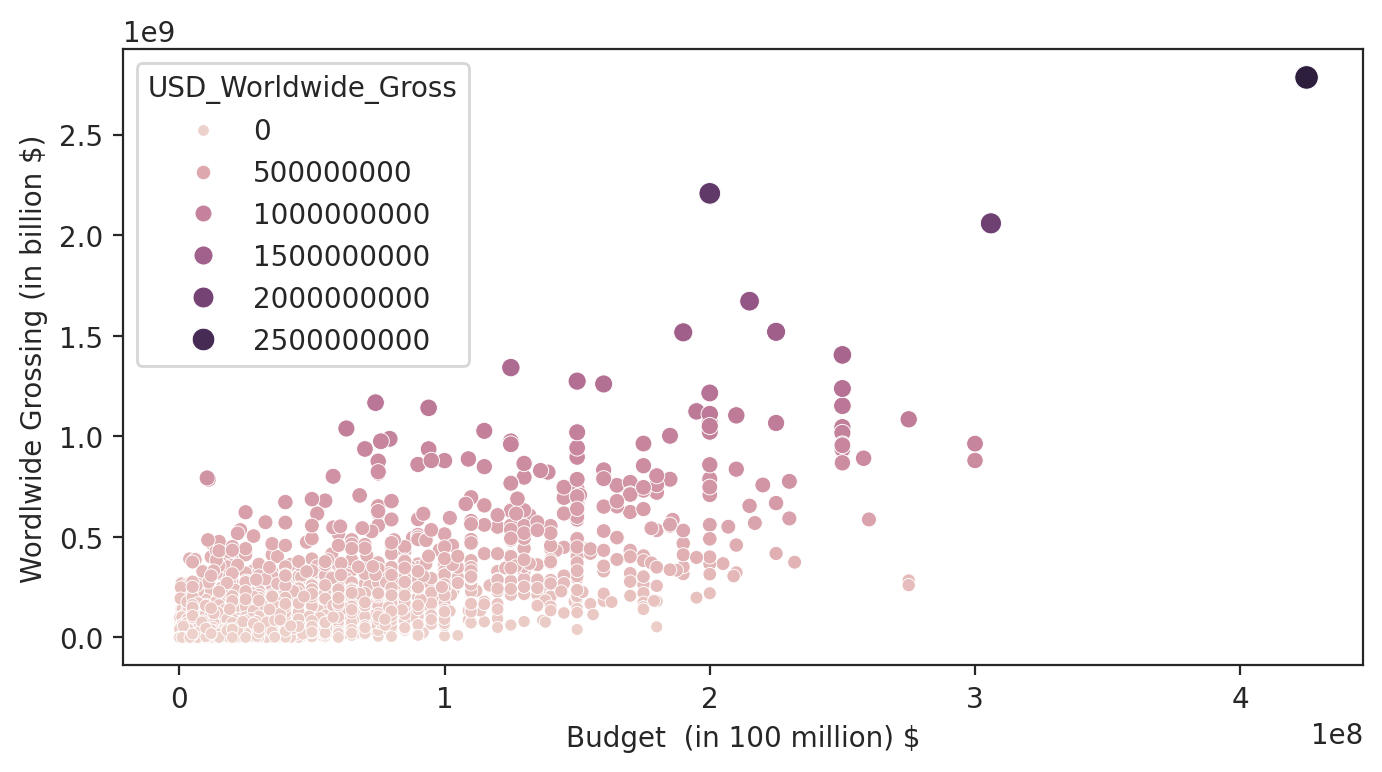

In [35]:
plt.figure(figsize=(8,4), dpi=200)

# some themes for axes_styles are ticks, darkgrid, whitegrid, dark and white
with sns.axes_style("ticks"):
    ax = sns.scatterplot(
        data=cleaned_data,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross',
                        )

    ax.set(
        xlabel='Budget  (in 100 million) $',
        ylabel='Wordlwide Grossing (in billion $)'
        )

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



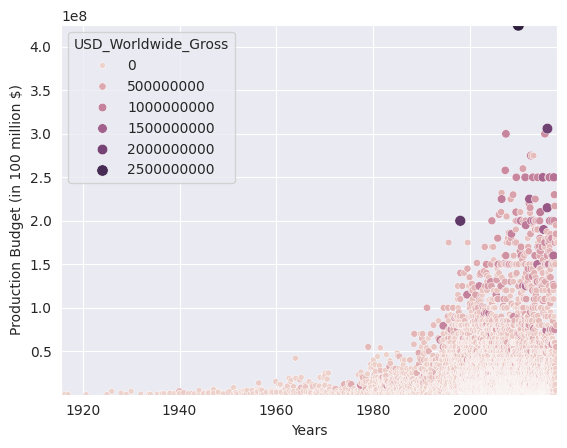

In [36]:
with sns.axes_style("darkgrid"):
    
    ax = sns.scatterplot(
        data = cleaned_data,
        x = 'Release_Date',
        y='USD_Production_Budget',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross',
    )

    ax.set(
        xlabel = "Years",
        ylabel = "Production Budget (in 100 million $)",
        xlim = (cleaned_data["Release_Date"].min(), cleaned_data["Release_Date"].max()),
        ylim = (cleaned_data["USD_Production_Budget"].min(), cleaned_data["USD_Production_Budget"].max())
    )

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [37]:
dt_indices = pd.DatetimeIndex(cleaned_data["Release_Date"])
years = dt_indices.year
decades = (years//10)*10
cleaned_data["Decades"] = decades
cleaned_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [38]:
old_movies = cleaned_data.query('Decades <= 1960')
new_movies = cleaned_data.query('Decades > 1960')

In [39]:
old_movies.shape

(153, 7)

In [40]:
new_movies.shape

(5231, 7)

In [41]:
old_movies[old_movies["USD_Production_Budget"] == old_movies["USD_Production_Budget"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [42]:
old_movies.sort_values("USD_Production_Budget", ascending=True).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960


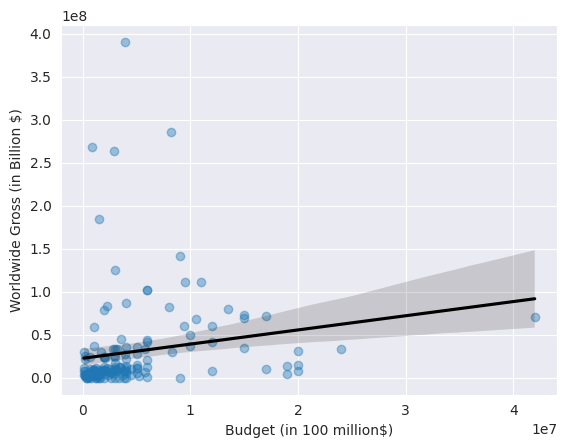

In [43]:
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data = old_movies,
        x = 'USD_Production_Budget',
        y = 'USD_Worldwide_Gross',
        line_kws= {
            "color" : 'black'
        },
        scatter_kws= {
            "alpha" : 0.4
        }
    )

    ax.set(
        xlabel = "Budget (in 100 million$)",
        ylabel = "Worldwide Gross (in Billion $)"
    )

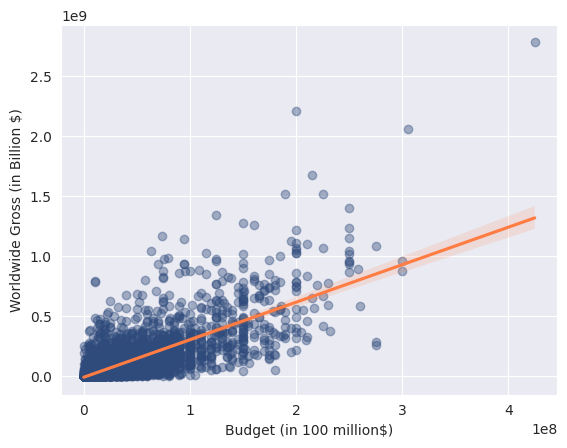

In [44]:
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data = new_movies,
        x = 'USD_Production_Budget',
        y = 'USD_Worldwide_Gross',
        line_kws= {
            "color" : "#ff7c43"
        },
        scatter_kws= {
            "alpha" : 0.4,
            "color" : "#2f4b7c"
        }
    )

    ax.set(
        xlabel = "Budget (in 100 million$)",
        ylabel = "Worldwide Gross (in Billion $)"
    )

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [46]:
from sklearn.linear_model import LinearRegression

In [52]:
X = pd.DataFrame(new_movies, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_movies, columns=["USD_Worldwide_Gross"])

In [53]:
model = LinearRegression()
model.fit(X, y)
print(f"Theta-0 : {model.intercept_}")
print(f"Theta-1 : {model.coef_}")

Theta-0 : [-8650768.00661042]
Theta-1 : [[3.12259592]]


In [58]:
model.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [59]:
X = pd.DataFrame(old_movies, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_movies, columns=["USD_Worldwide_Gross"])

In [62]:
model2 = LinearRegression()
model2.fit(X, y)
print(f"Theta-0 : {model2.intercept_}")
print(f"Theta-1 : {model2.coef_}")

Theta-0 : [22821538.63508039]
Theta-1 : [[1.64771314]]


In [63]:
model2.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [66]:
model.predict([[350000000]])

C:\Users\Ashok Bhatt\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.99521139e+08]])